In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

In [3]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [4]:
def findnull(d):
    print("Null Values:",d.isnull().sum())

In [5]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
len(train['City_Code_Patient'])

318438

In [7]:
(train['City_Code_Patient'].isnull().sum()/len(train['City_Code_Patient']))*100

1.4231969802598936

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

univariant Analysis

In [9]:
train['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [10]:
#Backup
train_original=train.copy()
test_original=test.copy()

<AxesSubplot:>

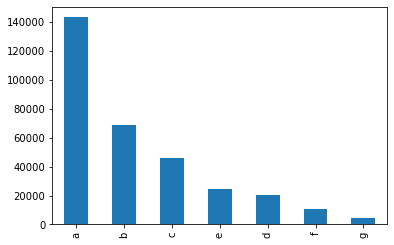

In [11]:
train['Hospital_type_code'].value_counts().plot.bar()

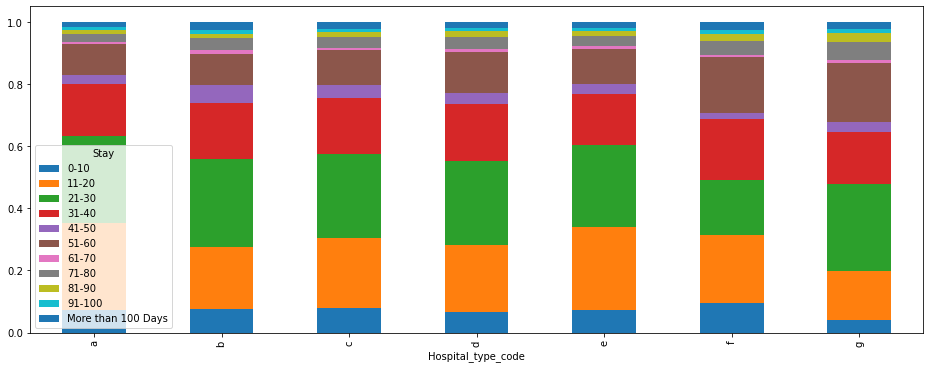

In [12]:
#Bivariant analysis
HCODE=pd.crosstab(train['Hospital_type_code'],train['Stay'])
HCODE.div(HCODE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))
plt.show()

<AxesSubplot:>

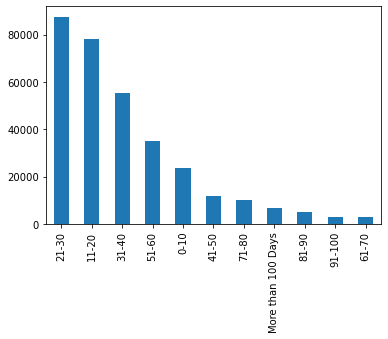

In [13]:
train['Stay'].value_counts().plot.bar()

Most of the patients stayed 11 to 40 days and 51 to 60 days based on the hospital type code.

Output is unbalanced dataset.

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

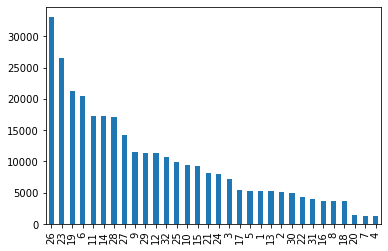

In [14]:
#Univarient analysis
train['Hospital_code'].value_counts().plot.bar()
train['Hospital_code'].value_counts()


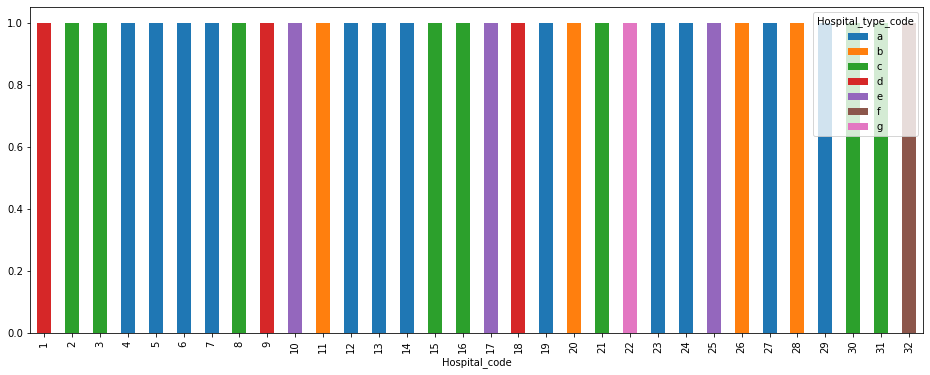

In [15]:
#Bivariant analysis
H_CODE=pd.crosstab(train['Hospital_code'],train['Hospital_type_code'])
H_CODE.div(H_CODE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))
plt.show()

hospital code have 32 code values however, type_code is related with hospital code. so, we can have hospital type code instead of hospital code. We will drop hospital code in the final data set.

In [16]:
train['City_Code_Hospital'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

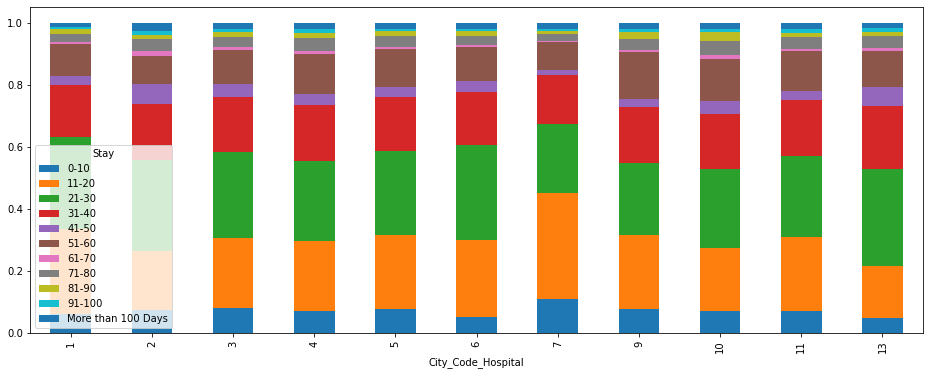

In [17]:
#Bivariant analysis
CCODE=pd.crosstab(train['City_Code_Hospital'],train['Stay'])
CCODE.div(CCODE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))
plt.show()

There are 13 ordinal values having more patients stayed between 11 to 40 days and 51-60 days.

In [18]:
train['Hospital_region_code'].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

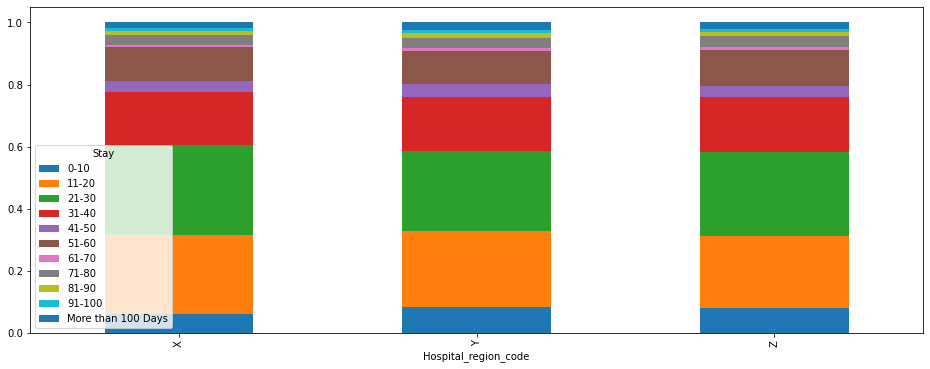

In [19]:
#grp_HRC=train.groupby('Hospital_region_code')['Stay']

#Bivariant analysis
HRCODE=pd.crosstab(train['Hospital_region_code'],train['Stay'])
HRCODE.div(HRCODE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))
plt.show()

In [20]:
train['Available Extra Rooms in Hospital'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
13        2
20        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

In [21]:
train['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [22]:
train['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [23]:
train['Ward_Facility_Code'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [24]:
train['Ward_Facility_Code'].fillna(train['Ward_Facility_Code'].mode()[0],inplace=True)
train['Ward_Facility_Code'].isnull().sum()

0

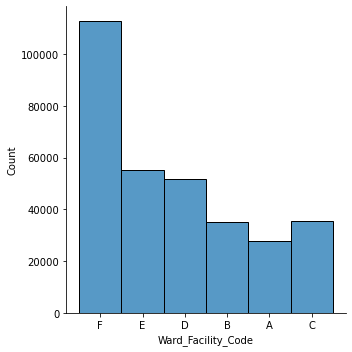

In [25]:
sns.displot(train['Ward_Facility_Code'])
plt.show()

In [26]:
train['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

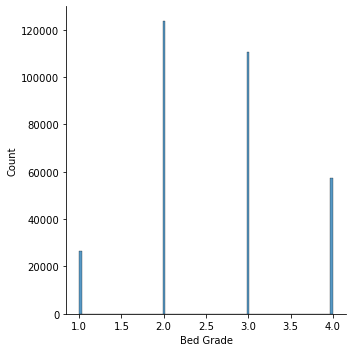

In [27]:
sns.displot(train['Bed Grade'])
plt.show()

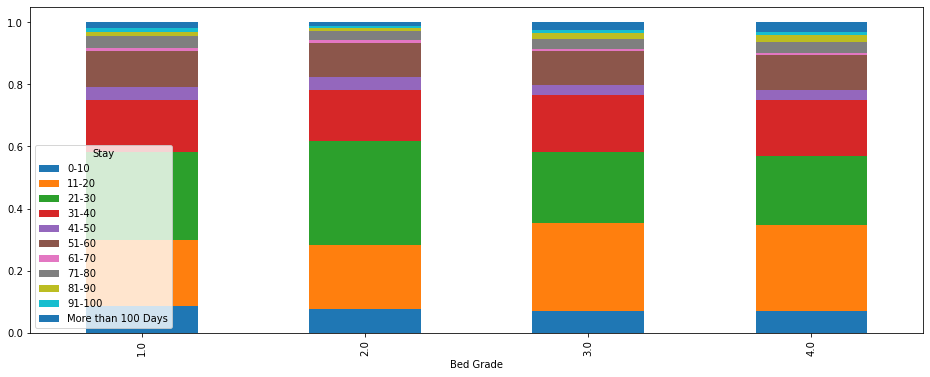

In [28]:
#Bivariant analysis
BEDGRADE=pd.crosstab(train['Bed Grade'],train['Stay'])
BEDGRADE.div(BEDGRADE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,6))
plt.show()

In [29]:
train['patientid'].value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
63360      1
85687      1
89781      1
97969      1
58524      1
Name: patientid, Length: 92017, dtype: int64

In [30]:
train['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

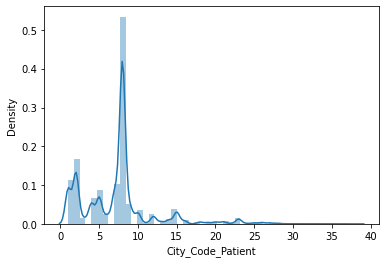

In [31]:
sns.distplot(train['City_Code_Patient'])
plt.show()

In [32]:
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mean(),inplace=True)
train['City_Code_Patient'].isnull().sum()

0

<AxesSubplot:>

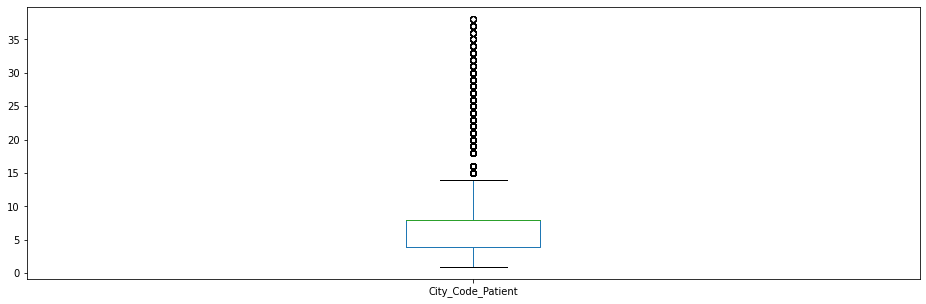

In [33]:
train['City_Code_Patient'].plot.box(figsize=(16,5))

In [34]:
train['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [35]:
train['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [36]:
train['Visitors with Patient'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64

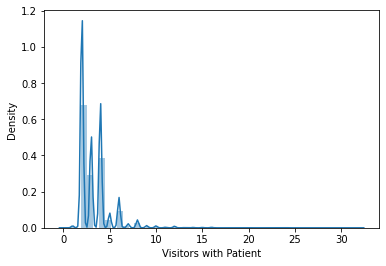

In [37]:
sns.distplot(train['Visitors with Patient'])
plt.show()

In [38]:
train['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [39]:
train['Admission_Deposit'].value_counts()

4469.0    390
4277.0    377
4624.0    350
4789.0    302
4970.0    286
         ... 
9571.0      1
8724.0      1
1855.0      1
2109.0      1
7881.0      1
Name: Admission_Deposit, Length: 7300, dtype: int64

In [40]:
train.corr()

case_id  Hospital_code  \
case_id                            1.000000      -0.043023   
Hospital_code                     -0.043023       1.000000   
City_Code_Hospital                -0.011352       0.128294   
Available Extra Rooms in Hospital  0.042580      -0.059638   
Bed Grade                          0.013702      -0.013739   
patientid                         -0.004150       0.002291   
City_Code_Patient                  0.064736      -0.015421   
Visitors with Patient              0.001309      -0.028500   
Admission_Deposit                 -0.045972       0.045446   

                                   City_Code_Hospital  \
case_id                                     -0.011352   
Hospital_code                                0.128294   
City_Code_Hospital                           1.000000   
Available Extra Rooms in Hospital           -0.045771   
Bed Grade                                   -0.049309   
patientid                                    0.000750   
City_Code_Patient                           -0.023819   
Visitors with Patient                        0.018184   
Admission_Deposit                           -0.034455   

                                   Available Extra Rooms in Hospital  \
case_id                                                     0.042580   
Hospital_code                                              -0.059638   
City_Code_Hospital                                         -0.045771   
Available Extra Rooms in Hospital                           1.000000   
Bed Grade                                                  -0.115868   
patientid                                                   0.000921   
City_Code_Patient                                          -0.009610   
Visitors with Patient                                       0.096714   
Admission_Deposit                                          -0.143739   

                                   Bed Grade  patientid  City_Code_Patient  \
case_id                             0.013702  -0.004150           0.064736   
Hospital_code                      -0.013739   0.002291          -0.015421   
City_Code_Hospital                 -0.049309   0.000750          -0.023819   
Available Extra Rooms in Hospital  -0.115868   0.000921          -0.009610   
Bed Grade                           1.000000   0.001645          -0.008043   
patientid                           0.001645   1.000000           0.001988   
City_Code_Patient                  -0.008043   0.001988           1.000000   
Visitors with Patient               0.088945   0.006889          -0.011971   
Admission_Deposit                   0.073833  -0.000877           0.025638   

                                   Visitors with Patient  Admission_Deposit  
case_id                                         0.001309          -0.045972  
Hospital_code                                  -0.028500           0.045446  
City_Code_Hospital                              0.018184          -0.034455  
Available Extra Rooms in Hospital               0.096714          -0.143739  
Bed Grade                                       0.088945           0.073833  
patientid                                       0.006889          -0.000877  
City_Code_Patient                              -0.011971           0.025638  
Visitors with Patient                           1.000000          -0.150358  
Admission_Deposit                              -0.150358           1.000000

In [41]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [42]:
group1 = train.groupby('Age')['Stay']
group1

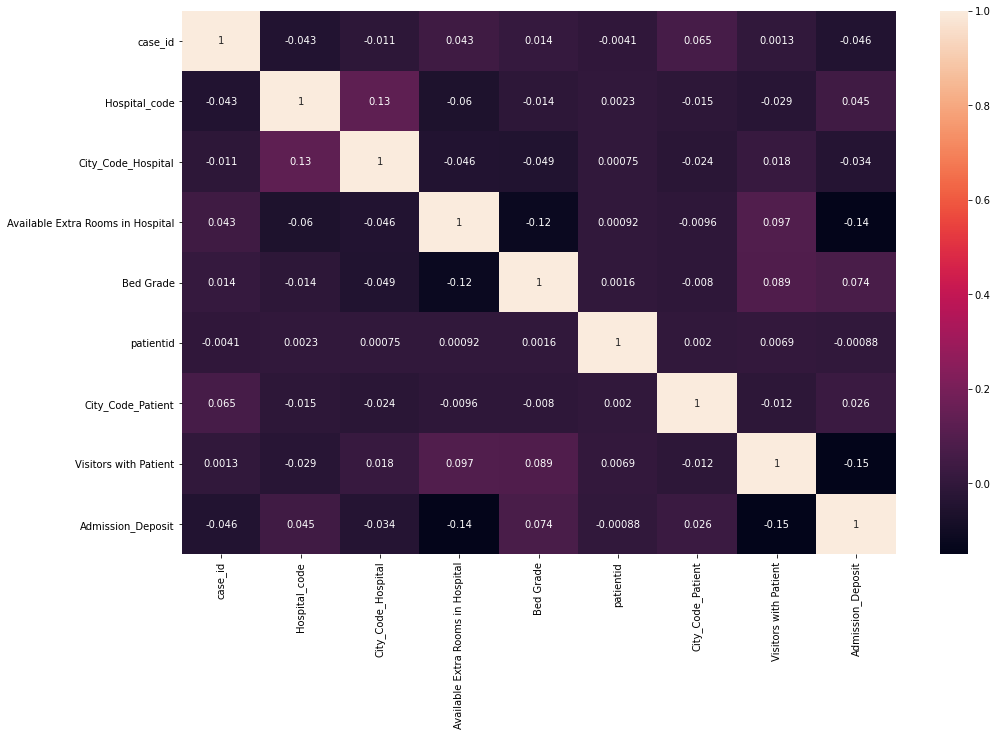

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), annot=True, linecolor='w');

Given dataset contains less correlation."Visitors with patient" some correlation with "Bed Grade","Available Extra rooms in hospital".And Admission_Deposit is positive correlation with Bed Grade.

In [44]:
profile=ProfileReport(train)
profile

In [45]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [46]:
test['City_Code_Patient'].fillna(test['City_Code_Patient'].median(),inplace=True)

In [47]:
test['City_Code_Patient'].mean(),test['City_Code_Patient'].median()

(7.2558935333474395, 8.0)

In [48]:
test['Bed Grade'].mean(),test['Bed Grade'].median()

(2.634489352074849, 3.0)

In [77]:
test['Bed Grade'].fillna(test['Bed Grade'].median(),inplace=True)

In [78]:
test.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [79]:
#train=train.drop(['case_id'],axis=1)
#test=test.drop(['case_id'],axis=1)

In [101]:
train.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [99]:
train['Bed Grade'].fillna(train['Bed Grade'].median(),inplace=True)

In [80]:
#train=pd.get_dummies(train)
#test=pd.get_dummies(test)

In [81]:
#train.head()

In [82]:
#pd.set_option('display.max_columns', None)

In [83]:
#train.head(3)

In [100]:
train.head()

Hospital_code Hospital_type_code  City_Code_Hospital Hospital_region_code  \
0              8                  c                   3                    Z   
1              2                  c                   5                    Z   
2             10                  e                   1                    X   
3             26                  b                   2                    Y   
4             26                  b                   2                    Y   

   Available Extra Rooms in Hospital    Department Ward_Type  \
0                                  3  radiotherapy         R   
1                                  2  radiotherapy         S   
2                                  2    anesthesia         S   
3                                  2  radiotherapy         R   
4                                  2  radiotherapy         S   

  Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0                  F        2.0      31397                7.0   
1                  F        2.0      31397                7.0   
2                  E        2.0      31397                7.0   
3                  D        2.0      31397                7.0   
4                  D        2.0      31397                7.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0             4911.0   0-10  
1             5954.0  41-50  
2             4745.0  31-40  
3             7272.0  41-50  
4             5558.0  41-50

In [127]:
X=train.drop(['Stay'],axis=1)
train['Stay_rep']=train['Stay'].replace('0-10',0)

In [129]:
train['Stay'],train['Stay_rep']

(0          0-10
 1         41-50
 2         31-40
 3         41-50
 4         41-50
           ...  
 318433    11-20
 318434    31-40
 318435    11-20
 318436    11-20
 318437     0-10
 Name: Stay, Length: 318438, dtype: object,
 0             0
 1         41-50
 2         31-40
 3         41-50
 4         41-50
           ...  
 318433    11-20
 318434    31-40
 318435    11-20
 318436    11-20
 318437        0
 Name: Stay_rep, Length: 318438, dtype: object)

In [159]:
train['Stay'].replace('0-10',0,inplace=True)
train['Stay'].replace('11-20',1,inplace=True)
train['Stay'].replace('21-30',2,inplace=True)
train['Stay'].replace('31-40',3,inplace=True)
train['Stay'].replace('41-50',4,inplace=True)
train['Stay'].replace('51-60',5,inplace=True)
train['Stay'].replace('61-70',6,inplace=True)
train['Stay'].replace('71-80',7,inplace=True)
train['Stay'].replace('81-90',8,inplace=True)
train['Stay'].replace('91-100',9,inplace=True)
train['Stay'].replace('More than 100 Days',10,inplace=True)

In [160]:
train['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [161]:
y=train['Stay']

In [156]:
train.Stay[train.Stay=='0-10']==0
train.Stay[train.Stay=='11-20']==1
train.Stay[train.Stay=='21-30']==2
train.Stay[train.Stay=='31-40']==3
train.Stay[train.Stay=='41-50']==4
train.Stay[train.Stay=='51-60']==5
train.Stay[train.Stay=='61-70']==6
train.Stay[train.Stay=='71-80']==7
train.Stay[train.Stay=='81-90']==9
train.Stay[train.Stay=='More than 100 Days']==10


45        False
90        False
281       False
283       False
304       False
          ...  
317188    False
317189    False
317432    False
318277    False
318325    False
Name: Stay, Length: 6683, dtype: bool

In [158]:
train['Stay']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay, Length: 318438, dtype: object

In [155]:
train['Stay_rep']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay_rep, Length: 318438, dtype: object

In [162]:
X=train.drop(['Stay','Stay_rep'],axis=1)
y=train['Stay']

In [147]:
train['Stay_rep']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay_rep, Length: 318438, dtype: object

In [163]:
y.head()

0    0
1    4
2    3
3    4
4    4
Name: Stay, dtype: int64

In [173]:
X=pd.get_dummies(X)

In [133]:
X.head()

Hospital_code  City_Code_Hospital  Available Extra Rooms in Hospital  \
0              8                   3                                  3   
1              2                   5                                  2   
2             10                   1                                  2   
3             26                   2                                  2   
4             26                   2                                  2   

   Bed Grade  patientid  City_Code_Patient  Visitors with Patient  \
0        2.0      31397                7.0                      2   
1        2.0      31397                7.0                      2   
2        2.0      31397                7.0                      2   
3        2.0      31397                7.0                      2   
4        2.0      31397                7.0                      2   

   Admission_Deposit  Hospital_type_code_a  Hospital_type_code_b  ...  \
0             4911.0                     0                     0  ...   
1             5954.0                     0                     0  ...   
2             4745.0                     0                     0  ...   
3             7272.0                     0                     1  ...   
4             5558.0                     0                     1  ...   

   Age_0-10  Age_11-20  Age_21-30  Age_31-40  Age_41-50  Age_51-60  Age_61-70  \
0         0          0          0          0          0          1          0   
1         0          0          0          0          0          1          0   
2         0          0          0          0          0          1          0   
3         0          0          0          0          0          1          0   
4         0          0          0          0          0          1          0   

   Age_71-80  Age_81-90  Age_91-100  
0          0          0           0  
1          0          0           0  
2          0          0           0  
3          0          0           0  
4          0          0           0  

[5 rows x 51 columns]

In [174]:
sc=StandardScaler()

In [175]:
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled.head(3)

Hospital_code  City_Code_Hospital  Available Extra Rooms in Hospital  \
0      -1.195176           -0.571055                          -0.169177   
1      -1.890124            0.073580                          -1.025217   
2      -0.963527           -1.215691                          -1.025217   

   Bed Grade  patientid  City_Code_Patient  Visitors with Patient  \
0  -0.716984  -0.904442          -0.053458              -0.727923   
1  -0.716984  -0.904442          -0.053458              -0.727923   
2  -0.716984  -0.904442          -0.053458              -0.727923   

   Admission_Deposit  Hospital_type_code_a  Hospital_type_code_b  ...  \
0           0.027835             -0.905268             -0.525686  ...   
1           0.987556             -0.905268             -0.525686  ...   
2          -0.124910             -0.905268             -0.525686  ...   

   Age_0-10  Age_11-20  Age_21-30  Age_31-40  Age_41-50  Age_51-60  Age_61-70  \
0 -0.141538  -0.235762  -0.383577  -0.499762  -0.500301   2.358779  -0.343953   
1 -0.141538  -0.235762  -0.383577  -0.499762  -0.500301   2.358779  -0.343953   
2 -0.141538  -0.235762  -0.383577  -0.499762  -0.500301   2.358779  -0.343953   

   Age_71-80  Age_81-90  Age_91-100  
0  -0.355854  -0.159395   -0.064074  
1  -0.355854  -0.159395   -0.064074  
2  -0.355854  -0.159395   -0.064074  

[3 rows x 51 columns]

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [184]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [188]:
def predictions(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    test_pred = model.predict(X_test)
    
    actual = [y_train, y_test]
    
    pred = [train_pred, test_pred]
    
    data = ['Train', 'Test']
    
    for i in range(2):
        
        print(data[i],'\n')
        
        metrics(actual[i], pred[i])
def metrics(y_true, y_pred):
    print('MAE:', mean_absolute_error(y_true, y_pred))
    
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RSME:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    

In [139]:
lr=LinearRegression()



In [166]:
X_train.shape

(222906, 16)

In [167]:
X_train.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [172]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222906 entries, 53110 to 249342
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      222906 non-null  int64  
 1   Hospital_type_code                 222906 non-null  object 
 2   City_Code_Hospital                 222906 non-null  int64  
 3   Hospital_region_code               222906 non-null  object 
 4   Available Extra Rooms in Hospital  222906 non-null  int64  
 5   Department                         222906 non-null  object 
 6   Ward_Type                          222906 non-null  object 
 7   Ward_Facility_Code                 222906 non-null  object 
 8   Bed Grade                          222906 non-null  float64
 9   patientid                          222906 non-null  int64  
 10  City_Code_Patient                  222906 non-null  float64
 11  Type of Admission                  

In [168]:
y.value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [169]:
y.nunique()

11

In [170]:
y.columns

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
#predictions(lr,X_train,X_test,y_train,y_test)

y.iloc[1]=y.iloc[0].replace('0-10',0)

In [177]:
lr.fit(X_train,y_train)

LinearRegression()

In [181]:
predictions(lr,X_train,X_test,y_train,y_test)

Train 

MAE: 1.2423533040577401
MSE: 2.812771993653366
RSME: 1.6771320740041216
R2 Score: 0.3910701726535538
Test 

MAE: 1.2432231945928485
MSE: 2.823174427750257
RSME: 1.680230468641209
R2 Score: 0.3904027091202781


In [179]:
dtree = DecisionTreeRegressor()

In [180]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [187]:
predictions(dtree,X_train,X_test,y_train,y_test)

Train 

MAE: 8.972391949969942e-06
MSE: 4.486195974984971e-06
RSME: 0.0021180642046418167
R2 Score: 0.9999990287948876


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [190]:
pred_train=dtree.predict(X_train)
pred_test=dtree.predict(X_test)
dtree.score(X_test,y_test)

-0.04961821011227241

In [192]:
from lightgbm import LGBMClassifier

In [194]:
train_original.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [195]:
test_original.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [197]:
train_df=train_original
test_df=test_original

In [199]:
train_df['is_train']=1
test_df['is_train']=0
test_df['Stay'] = -1

In [200]:
full_df = train_df.append(test_df)
full_df.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397                7.0   
1         S                  F        2.0      31397                7.0   
2         S                  E        2.0      31397                7.0   
3         R                  D        2.0      31397                7.0   
4         S                  D        2.0      31397                7.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  is_train  
0             4911.0   0-10         1  
1             5954.0  41-50         1  
2             4745.0  31-40         1  
3             7272.0  41-50         1  
4             5558.0  41-50         1

In [203]:
full_df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
is_train                             0
dtype: int64

In [202]:
full_df.fillna('-999',inplace=True)

In [204]:
full_df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                             object
patientid                              int64
City_Code_Patient                     object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
is_train                               int64
dtype: object

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
cols = [ 'Hospital_type_code',
       'Hospital_region_code', 
       'Department', 'Ward_Type', 'Ward_Facility_Code','City_Code_Patient',
        'Type of Admission',
       'Severity of Illness',  'Age', 'Bed Grade'
       ]

In [207]:
for col in cols:
    if full_df[col].dtype==object:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(full_df[col].values.astype('str')))
        full_df[col] = lbl.transform(list(full_df[col].values.astype('str')))

Hospital_type_code
Hospital_region_code
Department
Ward_Type
Ward_Facility_Code
City_Code_Patient
Type of Admission
Severity of Illness
Age
Bed Grade


In [208]:
full_df

case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0             1              8                   2                   3   
1             2              2                   2                   5   
2             3             10                   4                   1   
3             4             26                   1                   2   
4             5             26                   1                   2   
...         ...            ...                 ...                 ...   
137052   455491             11                   1                   2   
137053   455492             25                   4                   1   
137054   455493             30                   2                   3   
137055   455494              5                   0                   1   
137056   455495              6                   0                   6   

        Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                          2                                  3           3   
1                          2                                  2           3   
2                          0                                  2           1   
3                          1                                  2           3   
4                          1                                  2           3   
...                      ...                                ...         ...   
137052                     1                                  4           1   
137053                     0                                  2           3   
137054                     2                                  2           1   
137055                     0                                  2           1   
137056                     0                                  3           2   

        Ward_Type  Ward_Facility_Code  Bed Grade  patientid  \
0               2                   5          2      31397   
1               3                   5          2      31397   
2               3                   4          2      31397   
3               2                   3          2      31397   
4               3                   3          2      31397   
...           ...                 ...        ...        ...   
137052          1                   3          3      41160   
137053          2                   4          4      30985   
137054          2                   0          4      81811   
137055          2                   4          4      57021   
137056          1                   5          4     126729   

        City_Code_Patient  Type of Admission  Severity of Illness  \
0                      35                  0                    0   
1                      35                  1                    0   
2                      35                  1                    0   
3                      35                  1                    0   
4                      35                  1                    0   
...                   ...                ...                  ...   
137052                 22                  0                    1   
137053                 35                  0                    2   
137054                  4                  2                    1   
137055                  2                  1                    1   
137056                 22                  1                    0   

        Visitors with Patient  Age  Admission_Deposit   Stay  is_train  
0                           2    5             4911.0   0-10         1  
1                           2    5             5954.0  41-50         1  
2                           2    5             4745.0  31-40         1  
3                           2    5             7272.0  41-50         1  
4                           2    5             5558.0  41-50         1  
...                       ...  ...                ...    ...       ...  
137052                      4    4             6313.0     -1         0  


In [209]:
train = full_df[full_df['is_train']==1]
test = full_df[full_df['is_train']==0]
print(train.shape, test.shape)

train_df = train.copy()
test_df = test.copy()
del train, test

(318438, 19) (137057, 19)


In [210]:
X = train_df.drop(['Stay', 'is_train', 'case_id', 'patientid'],axis = 1)
y = train_df.Stay
test_X = test_df.drop(['Stay', 'is_train', 'case_id', 'patientid'],axis = 1)

print(X.columns)

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')


In [213]:
clf1 = LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=500, 
                      min_child_samples=20, random_state=1994,  n_jobs=-1, silent=False,force_col_wise=True)
clf1.fit(X,y)
pred=clf1.predict(test_X)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 318438, number of used features: 15
[LightGBM] [Info] Start training from score -2.602012
[LightGBM] [Info] Start training from score -1.404939
[LightGBM] [Info] Start training from score -1.291892
[LightGBM] [Info] Start training from score -1.753208
[LightGBM] [Info] Start training from score -3.300170
[LightGBM] [Info] Start training from score -2.207566
[LightGBM] [Info] Start training from score -4.754011
[LightGBM] [Info] Start training from score -3.435760
[LightGBM] [Info] Start training from score -4.186926
[LightGBM] [Info] Start training from score -4.746387
[LightGBM] [Info] Start training from score -3.863861


In [214]:
pred

array(['0-10', '51-60', '21-30', ..., '11-20', '11-20', '51-60'],
      dtype=object)

In [216]:
sub=pd.read_csv(r'sample_submission_lfbv3c3.csv')

In [218]:
# Read the submission file
sub['Stay']=pred
sub.to_csv('lgb_submission.csv', index=False)